In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, shapiro
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

# Modeling

In [74]:
modeling_df = pd.read_csv('df2.csv',index_col=0)
modeling_df.index = modeling_df.index.astype('str')

label_encoder = LabelEncoder()

# 범주형 데이터를 숫자로 변환
modeling_df['class'] = label_encoder.fit_transform(modeling_df['class'])
modeling_df

,Acetanaerobacterium,Acidaminococcus,Actinobacillus,Actinomyces,Adlercreutzia,Aerococcus,Agathobacter,Aggregatibacter,Akkermansia,Alistipes,...,[Eubacterium]_ruminantium_group,[Eubacterium]_siraeum_group,[Eubacterium]_ventriosum_group,[Eubacterium]_xylanophilum_group,[Ruminococcus]_gauvreauii_group,[Ruminococcus]_gnavus_group,[Ruminococcus]_torques_group,uncultured,vadinBE97,class
100033.0,0.000000,0.000000,0.0,0.0,0.000077,0.0,0.003954,0.000000,0.000000,0.093576,...,0.000000,0.000000,0.001854,0.001421,0.00000,0.000000,0.000711,0.004371,0.000000,0
100043.0,0.000000,0.001162,0.0,0.0,0.000039,0.0,0.007139,0.000000,0.005716,0.006747,...,0.001475,0.000000,0.004868,0.000000,0.00047,0.000261,0.000131,0.000757,0.000052,0
100052.0,0.000000,0.000000,0.0,0.0,0.001761,0.0,0.000000,0.000000,0.114730,0.004542,...,0.000000,0.001267,0.000000,0.000000,0.00411,0.000649,0.000958,0.031548,0.000000,0
100058.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.018173,0.000000,0.008553,0.023701,...,0.000000,0.000000,0.002789,0.000000,0.00000,0.004921,0.005640,0.009260,0.000000,0
100067.0,0.000587,0.000000,0.0,0.0,0.000031,0.0,0.001421,0.000000,0.110267,0.006161,...,0.000000,0.000000,0.002347,0.000000,0.00000,0.000479,0.002393,0.000108,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92044.0,0.000389,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.109601,0.001455,...,0.000000,0.000000,0.006758,0.000375,0.00000,0.002680,0.000865,0.000893,0.000000,0
92056.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.026187,0.000000,0.000039,0.068901,...,0.000000,0.000000,0.003595,0.000000,0.00000,0.002013,0.007308,0.005203,0.000000,0
99011.0,0.000000,0.000000,0.0,0.0,0.000114,0.0,0.000000,0.000034,0.006894,0.016476,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.037959,0.001120,0.056813,0.000000,0
99061.0,0.000000,0.000239,0.0,0.0,0.000000,0.0,0.005418,0.000000,0.018886,0.039008,...,0.000124,0.000479,0.001637,0.001761,0.00000,0.000325,0.005552,0.025960,0.000000,0


In [75]:
modeling_df['class'].value_counts()

class
0    56
1    20
Name: count, dtype: int64

## model selection

In [76]:
models = {
    'reg' : LogisticRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'dt' : DecisionTreeClassifier(random_state=42),
    'rf' : RandomForestClassifier(random_state=42)
}

In [77]:
def kfold_model(model,n_splits,X,y):
    
    kf = StratifiedKFold(n_splits=n_splits)
    results = []
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # 모델 훈련
        model.fit(X_train, y_train)
    
        y_pred = model.predict(X_test)
        y_pred = [1 if i>0.5 else 0 for i in y_pred]
        f1 = f1_score(y_test, y_pred)
        results.append(f1)
    return results

In [78]:
# 각 모델 별 f1-score 값 평균
# 트리기반 모델이 회귀모델보다 좋은 성능을 보임
col = modeling_df.columns[:-1]
target = modeling_df.columns[-1]
X = modeling_df[col]
y = modeling_df[target]
avg_results_before = []
for n_model,model in models.items():
    n_splits = 5
    results = kfold_model(model,n_splits,X,y)
    avg_results_before.append(np.mean(results))
    print(f'{n_model} f1-score avg : {np.mean(results)}')

reg f1-score avg : 0.0
Lasso f1-score avg : 0.0
Ridge f1-score avg : 0.0
dt f1-score avg : 0.5417604617604617
rf f1-score avg : 0.14666666666666667


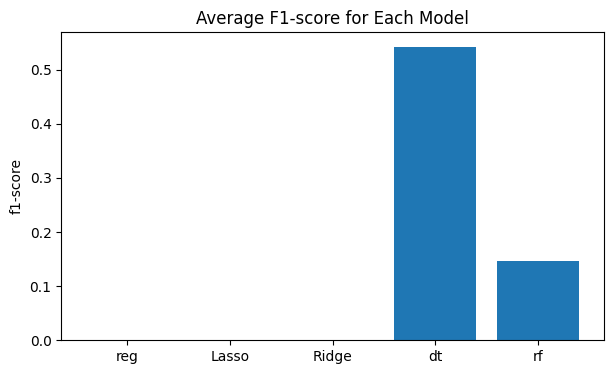

In [79]:
plt.figure(figsize=(7,4))
plt.bar(models.keys(),avg_results_before)
plt.title("Average F1-score for Each Model")
plt.ylabel('f1-score')
plt.show()

## preprocessing

In [80]:
models = {
    'dt' : DecisionTreeClassifier(random_state=42),
    'rf' : RandomForestClassifier(random_state=42)
}

### Over sampling

In [81]:
# 데이터 불균형 해결을 위해 오버샘플링 

col = modeling_df.columns[:-1]
target = modeling_df.columns[-1]
X = modeling_df[col]
y = modeling_df[target]

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
y_resampled.value_counts()

class
0    56
1    56
Name: count, dtype: int64

In [82]:
# 오버샘플링 후 모델 test -> 성능향상 확인
avg_results_after = []
for n_model,model in models.items():
    n_splits = 5
    results = kfold_model(model,n_splits,X_resampled,y_resampled)
    print(f'{n_model} f1-score avg : {np.mean(results)}')
    avg_results_after.append(np.mean(results))    

dt f1-score avg : 0.9049795615013005
rf f1-score avg : 0.9426666666666665


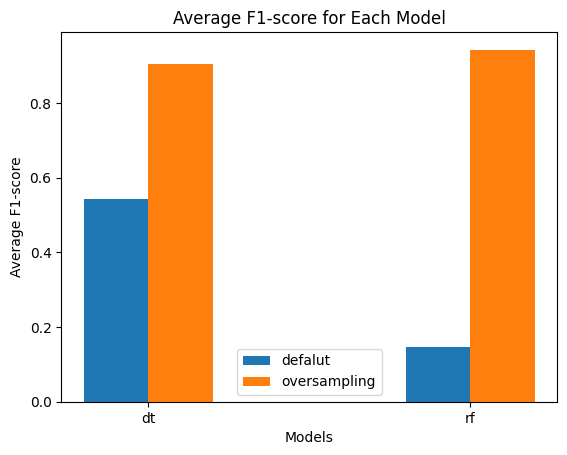

In [83]:
# 막대 그래프 설정
bar_width = 0.2
index = np.arange(len(models.keys()))

# 막대 그래프 그리기
plt.bar(index, avg_results_before[-2:], width = bar_width, label='defalut')
plt.bar(index + bar_width, avg_results_after,width = bar_width, label='oversampling')

# x축 레이블과 범례 설정
plt.xlabel('Models')
plt.ylabel('Average F1-score')
plt.title('Average F1-score for Each Model')
plt.xticks(index + bar_width/2, models.keys())
plt.legend()

# 그래프 출력
plt.show()


### Feature selection  
맨휘트니 검정을 통해 얻었던 41개의 유의미한 변수만을 사용해 예측

In [84]:
import pickle
# 피클 파일에서 significant_df 를 불러오기
with open('significant_df.pkl', 'rb') as f:
    significant_df = pickle.load(f)

In [85]:
selected_col = significant_df.index
target = modeling_df.columns[-1]
print('column 개수: ',len(selected_col))
X = modeling_df[selected_col]
y = modeling_df[target]
avg_results_selected = []
# 오버샘플링 후 모델 test -> 성능향상 확인
for n_model,model in models.items():
    n_splits = 5
    results = kfold_model(model,n_splits,X,y)
    print(f'{n_model} f1-score avg : {np.mean(results)}')
    avg_results_selected.append(np.mean(results))    

column 개수:  41
dt f1-score avg : 0.46333333333333326
rf f1-score avg : 0.6133333333333333


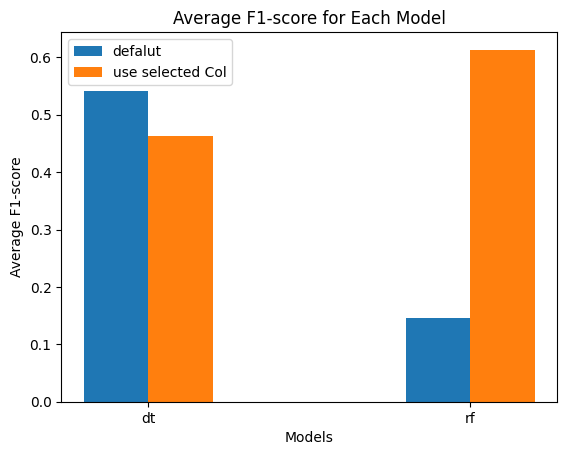

In [86]:
# 막대 그래프 설정
bar_width = 0.2
index = np.arange(len(models.keys()))

# 막대 그래프 그리기
plt.bar(index, avg_results_before[-2:], width = bar_width, label='defalut')
plt.bar(index + bar_width, avg_results_selected,width = bar_width, label='use selected Col')

# x축 레이블과 범례 설정
plt.xlabel('Models')
plt.ylabel('Average F1-score')
plt.title('Average F1-score for Each Model')
plt.xticks(index + bar_width/2, models.keys())
plt.legend()

# 그래프 출력
plt.show()


## Validation

In [87]:
selected_col = significant_df.index
target = modeling_df.columns[-1]

X = modeling_df[selected_col]
y = modeling_df[target]

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [67]:
def training(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    results = f1_score(y_true = y_test,y_pred = y_pred)
    return y_pred,results

In [68]:
y_preds = []
model_results = []
fi_list = []
for n_model,model in models.items():
    y_pred, results = training(model,X_train,y_train,X_test,y_test)
    y_preds.append(y_pred)
    print(f'{n_model} f1-score : {results}')
    model_results.append(results)
    fi_list.append(model.feature_importances_)

dt f1-score : 0.8
rf f1-score : 1.0


In [69]:
cr = classification_report(y_test, y_preds[0])
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        20
           1       0.67      1.00      0.80        14

    accuracy                           0.79        34
   macro avg       0.83      0.82      0.79        34
weighted avg       0.86      0.79      0.79        34



In [70]:
cr = classification_report(y_test, y_preds[1])
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



## Feature importance

In [71]:
rf_fi = pd.DataFrame(fi_list[1],index = selected_col,columns=['val']).sort_values(by='val',ascending=False)

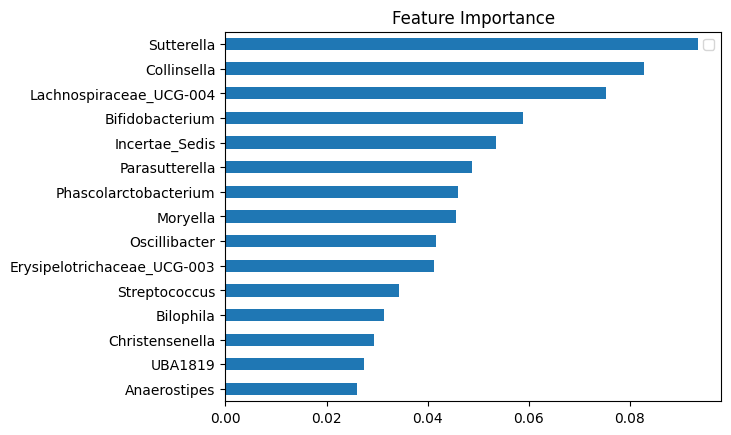

In [72]:
rf_fi[:15][::-1].plot(kind='barh')
plt.title('Feature Importance')
plt.legend('')
plt.ylabel('')
plt.show()